In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
#@title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
# @title Plotting functions
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF',
                   length_includes_head=True, zorder=2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08,
                        color='#DC267F',
                        length_includes_head=True, zorder=3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr],
                  [r"Vector $\mathbf{v}$",
                   r"Normalized vector $\tilde{\mathbf{v}}$"],
                  handlelength=0, fontsize=20, loc='upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
      FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
      self._verts3d = xs, ys, zs

    def draw(self, renderer):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
      self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
      FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
      self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
    def normalize_vector(input_vector);
""" nomalizes a vector to length 1
    
    imputs:
        imput_vector(ndarray): array of shape(n_dim) where n_dim is the
        dimensionality of the vector
    outputs:
    (ndarray): normalized vector of length 1
"""
  #################################################################################
  ## TODO for students: complete normalize_vector function ##
  # Fill out function and remove
  raise NotImplementedError("Student exercise: complete normalize_vector function")
  #################################################################################

# Compute vector length (use np.linalg.norm)

vector_length = np.linalg(input_vector)

# create vector v from above (use np.array)

normalized_vector = input_vector / vector_length

return normalized_vector

# create vector v from above (use np.array)

v = np.array([4,1])

# call the fenction
v_unit = normalize_vector(v)

#visualize the vectors
visualize_vectors(v,v_unit)

SyntaxError: invalid syntax (3428185700.py, line 64)

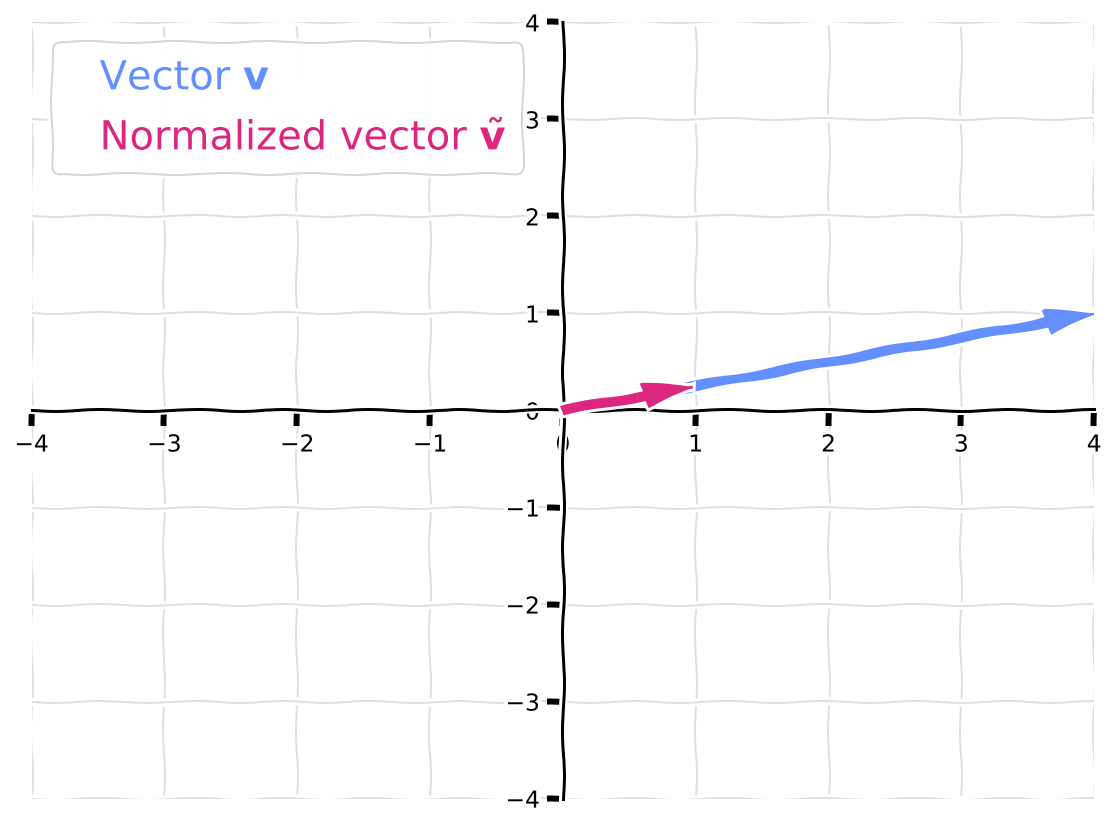

In [20]:
def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """

  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector)

  # Create normalized vector
  normalized_vector = input_vector / vector_length

  return normalized_vector

# Create vector v from above (use np.array)
v = np.array([4, 1])

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors
with plt.xkcd():
  visualize_vectors(v, v_unit)


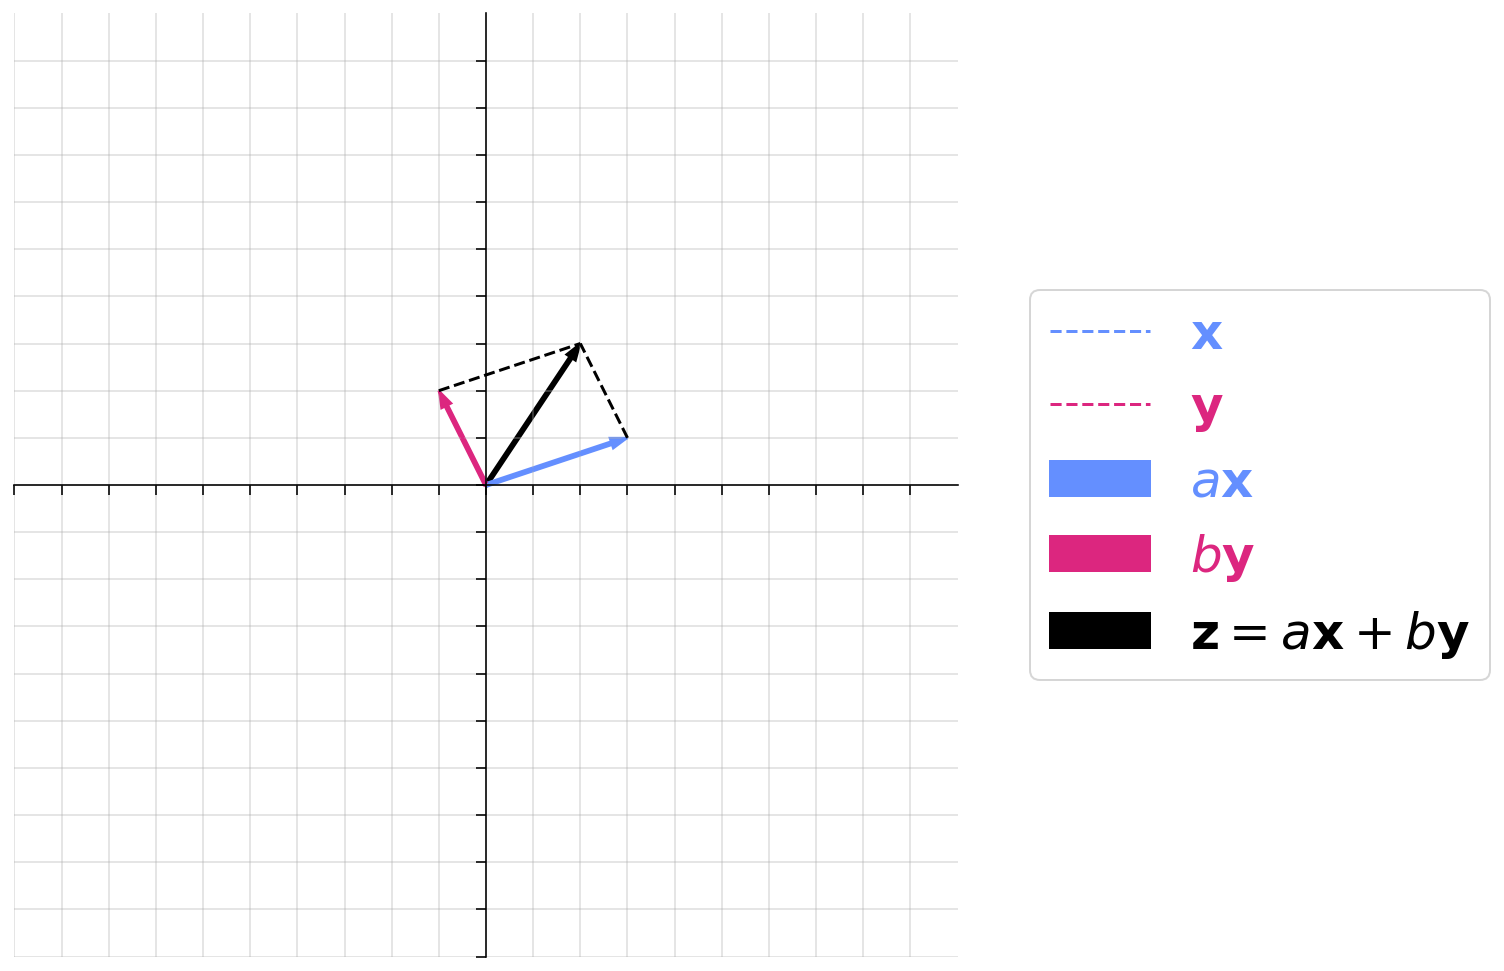

In [41]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, (a)*x, b*y)
"""
How does 𝑎𝐱 compare to 𝐱 when 𝑎 is negative?
= the direction of  ax is the exact opossit of x.

How does 𝑎𝐱 compare to 𝐱 when 𝑎 is a fraction?
= when a positive fraction, ax is the same direction but
shoter than x.

Can you get 𝐳 to point to anywhere in the 2D space 
= yes you can get 2 to point to anywhere in 2d space with

with combinations of 𝑎 and 𝑏?

Would this be the case no matter what 𝐱 and 𝐲 are, as long 

as they are both 2D vectors?
"""

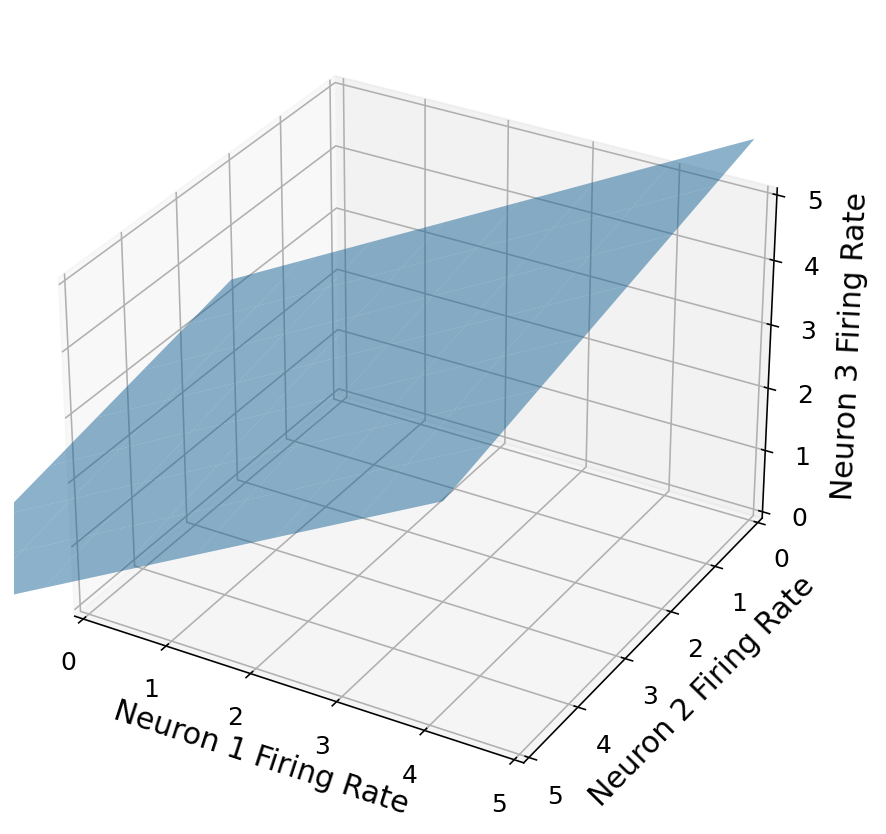

In [26]:
# @markdown Execute this cell to see figure

fig = plt.figure()

# add axes
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(-4, 4), range(-4, 4))
z = .7*xx + -.2*yy

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5], xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');
#ax.invert_xaxis()